### Importing modules

In [1]:
import zipfile
import os
import cv2
from google.colab.patches import cv2_imshow
from keras_preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
import joblib
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Part A. Processing the dataset and building baseline architecture

In [2]:
!git clone https://github.com/gagan-iitb/CS550.git

Cloning into 'CS550'...
remote: Enumerating objects: 599, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 599 (delta 9), reused 3 (delta 3), pack-reused 575
Receiving objects: 100% (599/599), 513.91 MiB | 13.24 MiB/s, done.
Resolving deltas: 100% (230/230), done.
Checking out files: 100% (149/149), done.


In [3]:
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [4]:
zipped_dirs = os.listdir('/content/CS550/Prog_Assignments/Asg4_dataset')

In [5]:
zipped_dirs.remove('Readme.md')
zipped_dirs.remove('Sample_Format.csv')
zipped_dirs.remove('test.zip')
zipped_dirs.remove('test2.zip')

In [6]:
zipped_dirs

['0_g.zip',
 '0_h.zip',
 '0_b.zip',
 '0_c.zip',
 '1_7.zip',
 '0_f.zip',
 '1_5.zip',
 '1_2.zip',
 '1_6.zip',
 '1_4.zip',
 '1_3.zip',
 '0_a.zip',
 '0_e.zip',
 '0_d.zip',
 '1_1.zip']

In [7]:
len(zipped_dirs) # we have 15 zipped directories

15

In [8]:
len(list(filter(lambda x:x.startswith('0'),zipped_dirs))) # we have 8 directories of class 0

8

In [9]:
len(list(filter(lambda x:x.startswith('1'),zipped_dirs))) # we have 7 directories of class 1

7

In [10]:
for dir in zipped_dirs:
  unzip_data(os.path.join('/content/CS550/Prog_Assignments/Asg4_dataset',dir))

In [11]:
unzipped_dirs = list(map(lambda x:x[:-4],zipped_dirs))

In [12]:
for dir in unzipped_dirs:
  print(f'Number of images in {dir} folder is: {len(os.listdir(os.path.join("/content",dir)))}')

Number of images in 0_g folder is: 3407
Number of images in 0_h folder is: 4356
Number of images in 0_b folder is: 2993
Number of images in 0_c folder is: 3338
Number of images in 1_7 folder is: 3555
Number of images in 0_f folder is: 4290
Number of images in 1_5 folder is: 2913
Number of images in 1_2 folder is: 3695
Number of images in 1_6 folder is: 4047
Number of images in 1_4 folder is: 3182
Number of images in 1_3 folder is: 3821
Number of images in 0_a folder is: 4066
Number of images in 0_e folder is: 4390
Number of images in 0_d folder is: 3795
Number of images in 1_1 folder is: 3640


In [13]:
train_dict = {
    0:[],
    1:[]
}

for dir in unzipped_dirs:
  train_dict[int(dir[0])].extend(list(map(lambda image: cv2.imread(os.path.join('/content',dir,image)),os.listdir(os.path.join('/content',dir)))))

In [14]:
len(train_dict[0]), len(train_dict[1])

(30635, 24853)

In [15]:
train_dict[0] = np.array(train_dict[0],dtype=object)
train_dict[1] = np.array(train_dict[1],dtype=object)

### Resizing

In [16]:
shapes_0 = set()

In [17]:
for img in train_dict[0]:
  shapes_0.add(img.shape)

In [18]:
shapes_0 # images don't have same shape

{(3, 50, 3),
 (7, 50, 3),
 (8, 50, 3),
 (33, 50, 3),
 (37, 50, 3),
 (49, 50, 3),
 (50, 22, 3),
 (50, 32, 3),
 (50, 41, 3),
 (50, 50, 3)}

In [19]:
shapes_1 = set()

In [20]:
for img in train_dict[1]:
  shapes_1.add(img.shape)

In [21]:
shapes_1 # images don't have same shape

{(49, 50, 3), (50, 50, 3)}

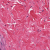

In [22]:
cv2_imshow(train_dict[0][0])

In [23]:
for i in range(len(train_dict[0])):
  train_dict[0][i] = cv2.resize(train_dict[0][i], (50, 50), interpolation = cv2.INTER_NEAREST)

In [24]:
for i in range(len(train_dict[1])):
  train_dict[1][i] = cv2.resize(train_dict[1][i], (50, 50), interpolation = cv2.INTER_NEAREST)

In [25]:
shapes_0 = set()

In [26]:
for img in train_dict[0]:
  shapes_0.add(img.shape)

In [27]:
shapes_0

{(50, 50, 3)}

In [28]:
shapes_1 = set()

In [29]:
for img in train_dict[1]:
  shapes_1.add(img.shape)

In [30]:
shapes_1

{(50, 50, 3)}

### Normalizing Images

In [35]:
for i in range(len(train_dict[0])):
  train_dict[0][i] = train_dict[0][i]/255

In [36]:
for i in range(len(train_dict[1])):
  train_dict[1][i] = train_dict[1][i]/255

In [41]:
train_data = []

for img in train_dict[0]:
  train_data.append(np.array([img,0], dtype=object))

In [42]:
for img in train_dict[1]:
  train_data.append(np.array([img,1], dtype=object))

In [43]:
len(train_data)

55488

In [44]:
train_data = np.array(train_data,dtype=object)

In [45]:
np.random.shuffle(train_data)

In [46]:
train_data.shape

(55488, 2)

In [47]:
X_train = train_data[:,0]

In [48]:
y_train = train_data[:,1]

In [49]:
X_train.shape, y_train.shape

((55488,), (55488,))

In [50]:
X_train = [img for img in X_train]

In [51]:
X_train = np.array(X_train)

In [52]:
X_train.shape

(55488, 50, 50, 3)

In [53]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

### Image Augmentation

In [69]:
datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2) # data generator it will transform the images while fitting the model

In [70]:
datagen.fit(X_train)

### Baseline architecture

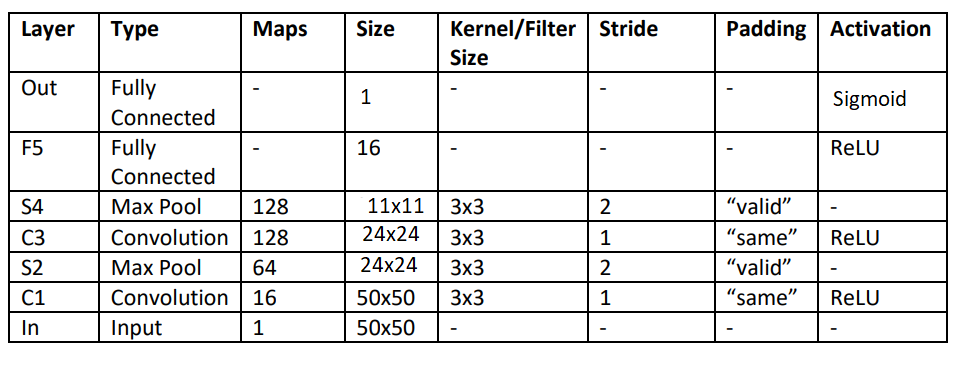

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), strides=1, padding="SAME", activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D(pool_size= (3, 3), strides=2, padding="VALID"))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="SAME", activation='relu'))
model.add(layers.MaxPooling2D(pool_size= (3, 3), strides=2, padding="VALID"))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       18560     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 128)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 15488)             0         
                                                                 
 dense_2 (Dense)             (None, 16)               

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(X_train, y_train,
         batch_size=32, subset='validation'),
         validation_batch_size = 32,
         epochs=10)

Epoch 1/10
1388/1388 [==============================] - 52s 37ms/step - loss: 0.5357 - precision_1: 0.7221 - recall_1: 0.6539 - auc_1: 0.8043 - val_loss: 0.4645 - val_precision_1: 0.8176 - val_recall_1: 0.6697 - val_auc_1: 0.8699
Epoch 2/10
1388/1388 [==============================] - 52s 38ms/step - loss: 0.4339 - precision_1: 0.7774 - recall_1: 0.7743 - auc_1: 0.8794 - val_loss: 0.4106 - val_precision_1: 0.7528 - val_recall_1: 0.8721 - val_auc_1: 0.9010
Epoch 3/10
1388/1388 [==============================] - 49s 36ms/step - loss: 0.3893 - precision_1: 0.8043 - recall_1: 0.8092 - auc_1: 0.9044 - val_loss: 0.4369 - val_precision_1: 0.8870 - val_recall_1: 0.6495 - val_auc_1: 0.9146
Epoch 4/10
1388/1388 [==============================] - 48s 35ms/step - loss: 0.3711 - precision_1: 0.8152 - recall_1: 0.8195 - auc_1: 0.9134 - val_loss: 0.3858 - val_precision_1: 0.7612 - val_recall_1: 0.9112 - val_auc_1: 0.9261
Epoch 5/10
1388/1388 [==============================] - 48s 35ms/step - loss: 0.

In [ ]:
result = model.evaluate(datagen.flow(X_train, y_train,
         batch_size=32, subset='validation'))

347/347 [==============================] - 9s 26ms/step - loss: 0.3022 - precision_1: 0.8651 - recall_1: 0.8292 - auc_1: 0.9440


In [ ]:
sample_data = datagen.flow(X_train, y_train,
         batch_size=32, subset='validation').next()

In [ ]:
def predictor(prob):
  if prob>=0.5:
    return 1
  else:
    return 0

In [ ]:
predicted = list(map(predictor, model.predict(sample_data[0])))

In [ ]:
output_dataframe = pd.DataFrame({'Predicted':predicted,'Original':sample_data[1]})

In [ ]:
output_dataframe

,Predicted,Original
0,0,0.0
1,0,0.0
2,0,0.0
3,1,1.0
4,0,0.0
5,1,1.0
6,1,1.0
7,0,0.0
8,0,0.0
9,1,1.0


In [ ]:
print('Precision: ',result[1])
print('Recall: ',result[2])
print('F1 score: ',(2*result[1]*result[2])/(result[1]+result[2]))
print('AUC: ',result[3])

Precision:  0.8650760054588318
Recall:  0.829184353351593
F1 score:  0.8467500103584988
AUC:  0.943962037563324


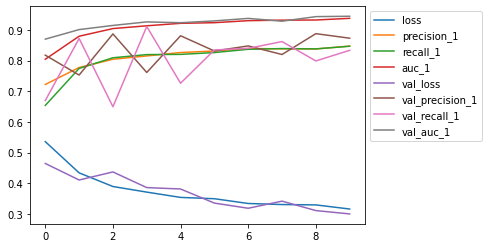

In [ ]:
pd.DataFrame(history.history).plot()
plt.legend(bbox_to_anchor=(1.0, 1.0))

### Part B. GoogLeNet Architecture (inception module layers)

In [ ]:
input_layer = layers.Input(shape=(50, 50, 3))

x = layers.Conv2D(filters=16, kernel_size=(3, 3), strides=1, padding="SAME", activation='relu', input_shape=(50, 50, 3))(input_layer)
x = layers.MaxPooling2D(pool_size= (3, 3), strides=2, padding="VALID")(x)
x = layers.Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="SAME", activation='relu')(x)
x = layers.MaxPooling2D(pool_size= (3, 3), strides=2, padding="VALID")(x)

# inception module layers

conv_1x1 = layers.Conv2D(filters=64, kernel_size=(1, 1), strides=1, padding='same', activation='relu')(x)

conv_3x3 = layers.Conv2D(filters=64, kernel_size=(1, 1), strides=1, padding='same', activation='relu')(x)
conv_3x3 = layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu')(conv_3x3)

conv_5x5 = layers.Conv2D(filters=64, kernel_size=(1, 1), strides=1, padding='same', activation='relu')(x)
conv_5x5 = layers.Conv2D(filters=64, kernel_size=(5, 5), strides=1, padding='same', activation='relu')(conv_5x5)

pool_proj = layers.MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
pool_proj = layers.Conv2D(filters =64, kernel_size=(1, 1), padding='same', activation='relu')(pool_proj)

x = layers.concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name='inception')


# inception module layers end

x = layers.MaxPool2D(pool_size=(11, 11), strides=(11, 11), padding='valid')(x)

x = layers.Flatten()(x)
x = layers.Dense(16, activation='relu')(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(inputs=[input_layer], outputs=[output])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 50, 50, 16)   448         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 24, 24, 16)   0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 24, 24, 128)  18560       ['max_pooling2d[0][0]']          
                                                                                              

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(X_train, y_train,
         batch_size=32, subset='validation'),
         validation_batch_size = 32,
         epochs=10)

Epoch 1/10
1388/1388 [==============================] - 66s 39ms/step - loss: 0.4903 - precision: 0.7531 - recall: 0.6981 - auc: 0.8411 - val_loss: 0.4671 - val_precision: 0.6987 - val_recall: 0.8442 - val_auc: 0.8666
Epoch 2/10
1388/1388 [==============================] - 51s 37ms/step - loss: 0.3939 - precision: 0.7999 - recall: 0.8145 - auc: 0.9024 - val_loss: 0.3357 - val_precision: 0.8528 - val_recall: 0.8238 - val_auc: 0.9311
Epoch 3/10
1388/1388 [==============================] - 52s 38ms/step - loss: 0.3646 - precision: 0.8176 - recall: 0.8298 - auc: 0.9172 - val_loss: 0.3258 - val_precision: 0.8644 - val_recall: 0.8133 - val_auc: 0.9355
Epoch 4/10
1388/1388 [==============================] - 52s 38ms/step - loss: 0.3416 - precision: 0.8298 - recall: 0.8398 - auc: 0.9275 - val_loss: 0.3490 - val_precision: 0.7626 - val_recall: 0.9169 - val_auc: 0.9383
Epoch 5/10
1388/1388 [==============================] - 50s 36ms/step - loss: 0.3312 - precision: 0.8398 - recall: 0.8402 - auc:

In [ ]:
result = model.evaluate(datagen.flow(X_train, y_train,
         batch_size=32, subset='validation'))

347/347 [==============================] - 9s 27ms/step - loss: 0.2621 - precision: 0.9079 - recall: 0.8323 - auc: 0.9578


In [ ]:
sample_data = datagen.flow(X_train, y_train,
         batch_size=32, subset='validation').next()

In [ ]:
def predictor(prob):
  if prob>=0.5:
    return 1
  else:
    return 0

In [ ]:
predicted = list(map(predictor, model.predict(sample_data[0])))

In [ ]:
output_dataframe = pd.DataFrame({'Predicted':predicted,'Original':sample_data[1]})

In [ ]:
output_dataframe

,Predicted,Original
0,1,1.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,1.0
5,1,1.0
6,1,1.0
7,0,0.0
8,0,0.0
9,1,1.0


In [ ]:
print('Precision: ',result[1])
print('Recall: ',result[2])
print('F1 score: ',(2*result[1]*result[2])/(result[1]+result[2]))
print('AUC: ',result[3])

Precision:  0.9079478979110718
Recall:  0.8322700262069702
F1 score:  0.8684634381891974
AUC:  0.9578379988670349


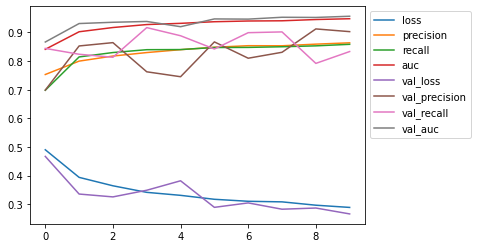

In [ ]:
pd.DataFrame(history.history).plot()
plt.legend(bbox_to_anchor=(1.0, 1.0))

### Part C. Transfer Learning with ResNet

In [ ]:
base_model = tf.keras.applications.ResNet152(weights = 'imagenet', include_top = False, input_shape = (50,50,3))
for layer in base_model.layers: # freezing the layers of base model
  layer.trainable = False       # so, that weights of base model are not updated initially

In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1000, activation='relu')(x)
output = layers.Dense(1, activation = 'sigmoid')(x)
model = models.Model(inputs=base_model.input, outputs=output)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 56, 56, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 25, 25, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 25, 25, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(X_train, y_train,
         batch_size=32, subset='validation'),
         validation_batch_size = 32,
         epochs=10)

Epoch 1/10
1388/1388 [==============================] - 98s 64ms/step - loss: 0.6641 - precision_1: 0.6033 - recall_1: 0.5793 - auc_1: 0.6835 - val_loss: 0.6149 - val_precision_1: 0.7191 - val_recall_1: 0.4478 - val_auc_1: 0.7407
Epoch 2/10
1388/1388 [==============================] - 86s 62ms/step - loss: 0.6109 - precision_1: 0.6299 - recall_1: 0.6180 - auc_1: 0.7220 - val_loss: 0.6002 - val_precision_1: 0.6471 - val_recall_1: 0.6576 - val_auc_1: 0.7478
Epoch 3/10
1388/1388 [==============================] - 87s 62ms/step - loss: 0.6006 - precision_1: 0.6430 - recall_1: 0.6326 - auc_1: 0.7359 - val_loss: 0.5927 - val_precision_1: 0.6199 - val_recall_1: 0.7360 - val_auc_1: 0.7562
Epoch 4/10
1388/1388 [==============================] - 85s 61ms/step - loss: 0.5968 - precision_1: 0.6465 - recall_1: 0.6289 - auc_1: 0.7401 - val_loss: 0.5852 - val_precision_1: 0.7222 - val_recall_1: 0.5562 - val_auc_1: 0.7643
Epoch 5/10
1388/1388 [==============================] - 87s 63ms/step - loss: 0.

In [ ]:
result = model.evaluate(datagen.flow(X_train, y_train,
         batch_size=32, subset='validation'))

347/347 [==============================] - 17s 49ms/step - loss: 0.5747 - precision_1: 0.6499 - recall_1: 0.7197 - auc_1: 0.7706


In [ ]:
sample_data = datagen.flow(X_train, y_train,
         batch_size=32, subset='validation').next()

In [ ]:
def predictor(prob):
  if prob>=0.5:
    return 1
  else:
    return 0

In [ ]:
predicted = list(map(predictor, model.predict(sample_data[0])))

In [ ]:
output_dataframe = pd.DataFrame({'Predicted':predicted,'Original':sample_data[1]})

In [ ]:
output_dataframe

,Predicted,Original
0,0,1.0
1,1,1.0
2,0,0.0
3,1,1.0
4,1,1.0
5,0,1.0
6,1,0.0
7,0,0.0
8,0,0.0
9,0,0.0


In [ ]:
print('Precision: ',result[1])
print('Recall: ',result[2])
print('F1 score: ',(2*result[1]*result[2])/(result[1]+result[2]))
print('AUC: ',result[3])

Precision:  0.6499001383781433
Recall:  0.7196863293647766
F1 score:  0.6830152838963668
AUC:  0.7705585956573486


In [209]:
# Now, we are not getting as much better results as we got
# in previous two architecture, so let's try unfreezing the layers
# of base model and fitting the model

In [ ]:
for layer in base_model.layers:
 layer.trainable = True

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(X_train, y_train,
         batch_size=32, subset='validation'),
         validation_batch_size = 32,
         epochs=10)

Epoch 1/10
1388/1388 [==============================] - 230s 151ms/step - loss: 0.5245 - precision_2: 0.7626 - recall_2: 0.7774 - auc_2: 0.8608 - val_loss: 0.5104 - val_precision_2: 0.8900 - val_recall_2: 0.7484 - val_auc_2: 0.9173
Epoch 2/10
1388/1388 [==============================] - 207s 149ms/step - loss: 0.3674 - precision_2: 0.8346 - recall_2: 0.8171 - auc_2: 0.9173 - val_loss: 0.9092 - val_precision_2: 0.5752 - val_recall_2: 0.8446 - val_auc_2: 0.7030
Epoch 3/10
1388/1388 [==============================] - 206s 148ms/step - loss: 0.3590 - precision_2: 0.8307 - recall_2: 0.8255 - auc_2: 0.9195 - val_loss: 0.4486 - val_precision_2: 0.7097 - val_recall_2: 0.9618 - val_auc_2: 0.9291
Epoch 4/10
1388/1388 [==============================] - 210s 152ms/step - loss: 0.3757 - precision_2: 0.8265 - recall_2: 0.8149 - auc_2: 0.9135 - val_loss: 0.5226 - val_precision_2: 0.8591 - val_recall_2: 0.8249 - val_auc_2: 0.9271
Epoch 5/10
1388/1388 [==============================] - 210s 151ms/step 

In [ ]:
result = model.evaluate(datagen.flow(X_train, y_train,
         batch_size=32, subset='validation'))

347/347 [==============================] - 17s 49ms/step - loss: 0.3372 - precision_2: 0.8543 - recall_2: 0.8110 - auc_2: 0.9306


In [ ]:
sample_data = datagen.flow(X_train, y_train,
         batch_size=32, subset='validation').next()

In [ ]:
def predictor(prob):
  if prob>=0.5:
    return 1
  else:
    return 0

In [ ]:
predicted = list(map(predictor, model.predict(sample_data[0])))

In [ ]:
output_dataframe = pd.DataFrame({'Predicted':predicted,'Original':sample_data[1]})

In [ ]:
output_dataframe

,Predicted,Original
0,1,1.0
1,0,0.0
2,0,0.0
3,0,1.0
4,1,1.0
5,0,0.0
6,0,0.0
7,0,0.0
8,0,0.0
9,1,0.0


In [ ]:
print('Precision: ',result[1])
print('Recall: ',result[2])
print('F1 score: ',(2*result[1]*result[2])/(result[1]+result[2]))
print('AUC: ',result[3])

Precision:  0.8542681932449341
Recall:  0.8109793066978455
F1 score:  0.8320610925590378
AUC:  0.9305947422981262


In [210]:
# Precision, Recall, F1 score and AUC of previous 2 models is given below:

# Baseline
# Precision:  0.8650760054588318
# Recall:  0.829184353351593
# F1 score:  0.8467500103584988
# AUC:  0.943962037563324

# GoogLeNet
# Precision:  0.9079478979110718
# Recall:  0.8322700262069702
# F1 score:  0.8684634381891974
# AUC:  0.9578379988670349

# If we compare all the 4 metrics ResNet is not performing
# better than previous two models in any of the 4 metrics

# So, ResNet is not performing good for our problem.

# Experiments

In [61]:
# Till now GoogLeNet Architecture is giving the best recall and f1-score
# Recall:  0.8322700262069702
# F1 score:  0.8684634381891974

# So, I am trying to use its basic architecture in my experiments with some modifications

In [80]:
# Lets first apply regularization in the same architecture using early stopping

In [123]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [82]:
input_layer = layers.Input(shape=(50, 50, 3))

x = layers.Conv2D(filters=16, kernel_size=(3, 3), strides=1, padding="SAME", activation='relu', input_shape=(50, 50, 3))(input_layer)
x = layers.MaxPooling2D(pool_size= (3, 3), strides=2, padding="VALID")(x)
x = layers.Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="SAME", activation='relu')(x)
x = layers.MaxPooling2D(pool_size= (3, 3), strides=2, padding="VALID")(x)

# inception module layers

conv_1x1 = layers.Conv2D(filters=64, kernel_size=(1, 1), strides=1, padding='same', activation='relu')(x)

conv_3x3 = layers.Conv2D(filters=64, kernel_size=(1, 1), strides=1, padding='same', activation='relu')(x)
conv_3x3 = layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu')(conv_3x3)

conv_5x5 = layers.Conv2D(filters=64, kernel_size=(1, 1), strides=1, padding='same', activation='relu')(x)
conv_5x5 = layers.Conv2D(filters=64, kernel_size=(5, 5), strides=1, padding='same', activation='relu')(conv_5x5)

pool_proj = layers.MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
pool_proj = layers.Conv2D(filters =64, kernel_size=(1, 1), padding='same', activation='relu')(pool_proj)

x = layers.concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name='inception')


# inception module layers end

x = layers.MaxPool2D(pool_size=(11, 11), strides=(11, 11), padding='valid')(x)

x = layers.Flatten()(x)
x = layers.Dense(16, activation='relu')(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(inputs=[input_layer], outputs=[output])

In [83]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

In [84]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(X_train, y_train,
         batch_size=32, subset='validation'),
         callbacks=[early_stopping_cb],
         validation_batch_size = 32,
         epochs=20)

Epoch 1/20
1388/1388 [==============================] - 61s 43ms/step - loss: 0.4829 - precision_2: 0.7549 - recall_2: 0.7110 - auc_2: 0.8462 - val_loss: 0.4324 - val_precision_2: 0.7118 - val_recall_2: 0.9184 - val_auc_2: 0.9094
Epoch 2/20
1388/1388 [==============================] - 59s 42ms/step - loss: 0.3646 - precision_2: 0.8131 - recall_2: 0.8339 - auc_2: 0.9170 - val_loss: 0.3167 - val_precision_2: 0.8716 - val_recall_2: 0.8146 - val_auc_2: 0.9410
Epoch 3/20
1388/1388 [==============================] - 57s 41ms/step - loss: 0.3373 - precision_2: 0.8311 - recall_2: 0.8452 - auc_2: 0.9292 - val_loss: 0.3241 - val_precision_2: 0.8809 - val_recall_2: 0.7943 - val_auc_2: 0.9416
Epoch 4/20
1388/1388 [==============================] - 59s 42ms/step - loss: 0.3140 - precision_2: 0.8464 - recall_2: 0.8516 - auc_2: 0.9387 - val_loss: 0.2799 - val_precision_2: 0.8565 - val_recall_2: 0.8712 - val_auc_2: 0.9512
Epoch 5/20
1388/1388 [==============================] - 57s 41ms/step - loss: 0.

In [85]:
result = model.evaluate(datagen.flow(X_train, y_train,
         batch_size=32, subset='validation'))

347/347 [==============================] - 11s 31ms/step - loss: 0.2816 - precision_2: 0.8535 - recall_2: 0.8731 - auc_2: 0.9505


In [94]:
sample_data = datagen.flow(X_train, y_train,
         batch_size=32, subset='validation').next()

In [95]:
def predictor(prob):
  if prob>=0.5:
    return 1
  else:
    return 0

In [96]:
predicted = list(map(predictor, model.predict(sample_data[0])))

1/1 [==============================] - 0s 145ms/step


In [97]:
output_dataframe = pd.DataFrame({'Predicted':predicted,'Original':sample_data[1]})

In [98]:
output_dataframe

,Predicted,Original
0,1,1.0
1,1,1.0
2,0,0.0
3,0,0.0
4,1,1.0
5,0,0.0
6,1,1.0
7,0,0.0
8,0,0.0
9,0,0.0


In [86]:
print('Precision: ',result[1])
print('Recall: ',result[2])
print('F1 score: ',(2*result[1]*result[2])/(result[1]+result[2]))
print('AUC: ',result[3])

Precision:  0.8534842133522034
Recall:  0.8730706572532654
F1 score:  0.8631663386931737
AUC:  0.9505361914634705


In [87]:
# Previously we were getting around 83% recall
# but now we are getting around 87% recall (good increase).

In [88]:
# architecture:
# convo -> max -> convo -> max -> convo -> max -> inception -> max -> dense -> output

In [65]:
input_layer = layers.Input(shape=(50, 50, 3))

x = layers.Conv2D(filters=50, kernel_size=(5, 5), strides=2, padding="SAME", activation='relu', input_shape=(50, 50, 3))(input_layer)
x = layers.MaxPooling2D(pool_size= (5, 5), strides=1, padding="VALID")(x)
x = layers.Conv2D(filters=128, kernel_size=(3, 3), strides=2, padding="SAME", activation='relu')(x)
x = layers.MaxPooling2D(pool_size= (5, 5), strides=1, padding="VALID")(x)
x = layers.Conv2D(filters=200, kernel_size=(1, 1), strides=2, padding="SAME", activation='relu')(x)
x = layers.MaxPooling2D(pool_size= (1, 1), strides=1, padding="VALID")(x)

# inception module layers

conv_1x1 = layers.Conv2D(filters=64, kernel_size=(1, 1), strides=1, padding='same', activation='relu')(x)

conv_3x3 = layers.Conv2D(filters=64, kernel_size=(1, 1), strides=1, padding='same', activation='relu')(x)
conv_3x3 = layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu')(conv_3x3)

conv_5x5 = layers.Conv2D(filters=64, kernel_size=(1, 1), strides=1, padding='same', activation='relu')(x)
conv_5x5 = layers.Conv2D(filters=64, kernel_size=(5, 5), strides=1, padding='same', activation='relu')(conv_5x5)

pool_proj = layers.MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
pool_proj = layers.Conv2D(filters =64, kernel_size=(1, 1), padding='same', activation='relu')(pool_proj)

x = layers.concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name='inception')

# inception module layers end


x = layers.MaxPool2D(pool_size=(4, 4), padding='valid')(x)

x = layers.Flatten()(x)
x = layers.Dense(16, activation='relu')(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(inputs=[input_layer], outputs=[output])

In [66]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 conv2d_30 (Conv2D)             (None, 25, 25, 50)   3800        ['input_5[0][0]']                
                                                                                                  
 max_pooling2d_16 (MaxPooling2D  (None, 21, 21, 50)  0           ['conv2d_30[0][0]']              
 )                                                                                                
                                                                                                  
 conv2d_31 (Conv2D)             (None, 11, 11, 128)  57728       ['max_pooling2d_16[0][0]'] 

In [67]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

In [71]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(X_train, y_train,
         batch_size=32, subset='validation'),
         validation_batch_size = 32,
         epochs=10)

Epoch 1/10
1388/1388 [==============================] - 65s 39ms/step - loss: 0.5615 - precision: 0.7070 - recall: 0.5838 - auc: 0.7774 - val_loss: 0.4811 - val_precision: 0.7585 - val_recall: 0.7254 - val_auc: 0.8506
Epoch 2/10
1388/1388 [==============================] - 55s 39ms/step - loss: 0.4560 - precision: 0.7760 - recall: 0.7451 - auc: 0.8651 - val_loss: 0.3986 - val_precision: 0.8069 - val_recall: 0.7918 - val_auc: 0.9017
Epoch 3/10
1388/1388 [==============================] - 54s 39ms/step - loss: 0.4072 - precision: 0.8022 - recall: 0.7836 - auc: 0.8948 - val_loss: 0.4962 - val_precision: 0.6744 - val_recall: 0.9492 - val_auc: 0.9081
Epoch 4/10
1388/1388 [==============================] - 54s 39ms/step - loss: 0.3815 - precision: 0.8144 - recall: 0.8055 - auc: 0.9084 - val_loss: 0.4587 - val_precision: 0.9189 - val_recall: 0.5475 - val_auc: 0.9219
Epoch 5/10
1388/1388 [==============================] - 55s 39ms/step - loss: 0.3664 - precision: 0.8165 - recall: 0.8201 - auc:

In [72]:
result = model.evaluate(datagen.flow(X_train, y_train,
         batch_size=32, subset='validation'))

347/347 [==============================] - 10s 29ms/step - loss: 0.3531 - precision: 0.8794 - recall: 0.7492 - auc: 0.9349


In [73]:
print('Precision: ',result[1])
print('Recall: ',result[2])
print('F1 score: ',(2*result[1]*result[2])/(result[1]+result[2]))
print('AUC: ',result[3])

Precision:  0.8793802261352539
Recall:  0.7491876482963562
F1 score:  0.8090799455399121
AUC:  0.9348641633987427


In [92]:
# Using this architecture we don't observe any enhancement

In [93]:
# Let's try early stopping on our baseline architecture

In [107]:
model = models.Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), strides=1, padding="SAME", activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D(pool_size= (3, 3), strides=2, padding="VALID"))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="SAME", activation='relu'))
model.add(layers.MaxPooling2D(pool_size= (3, 3), strides=2, padding="VALID"))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [108]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [109]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

In [110]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(X_train, y_train,
         batch_size=32, subset='validation'),
         callbacks=[early_stopping_cb],
         validation_batch_size = 32,
         epochs=20)

Epoch 1/20
1388/1388 [==============================] - 59s 42ms/step - loss: 0.5835 - precision_5: 0.6936 - recall_5: 0.5291 - auc_5: 0.7504 - val_loss: 0.5567 - val_precision_5: 0.6730 - val_recall_5: 0.7094 - val_auc_5: 0.7954
Epoch 2/20
1388/1388 [==============================] - 55s 39ms/step - loss: 0.4489 - precision_5: 0.7778 - recall_5: 0.7657 - auc_5: 0.8702 - val_loss: 0.4561 - val_precision_5: 0.8575 - val_recall_5: 0.6219 - val_auc_5: 0.8885
Epoch 3/20
1388/1388 [==============================] - 55s 40ms/step - loss: 0.3997 - precision_5: 0.8054 - recall_5: 0.8016 - auc_5: 0.8988 - val_loss: 0.3530 - val_precision_5: 0.8470 - val_recall_5: 0.8209 - val_auc_5: 0.9268
Epoch 4/20
1388/1388 [==============================] - 54s 39ms/step - loss: 0.3666 - precision_5: 0.8225 - recall_5: 0.8207 - auc_5: 0.9158 - val_loss: 0.3446 - val_precision_5: 0.8543 - val_recall_5: 0.7977 - val_auc_5: 0.9278
Epoch 5/20
1388/1388 [==============================] - 55s 40ms/step - loss: 0.

In [111]:
result = model.evaluate(datagen.flow(X_train, y_train,
         batch_size=32, subset='validation'))

347/347 [==============================] - 10s 29ms/step - loss: 0.3878 - precision_5: 0.7964 - recall_5: 0.8777 - auc_5: 0.9199


In [112]:
sample_data = datagen.flow(X_train, y_train,
         batch_size=32, subset='validation').next()

In [113]:
def predictor(prob):
  if prob>=0.5:
    return 1
  else:
    return 0

In [114]:
predicted = list(map(predictor, model.predict(sample_data[0])))

1/1 [==============================] - 0s 66ms/step


In [115]:
output_dataframe = pd.DataFrame({'Predicted':predicted,'Original':sample_data[1]})

In [116]:
output_dataframe

,Predicted,Original
0,1,1.0
1,1,1.0
2,0,0.0
3,1,0.0
4,1,1.0
5,1,1.0
6,0,0.0
7,1,0.0
8,0,0.0
9,0,0.0


In [117]:
print('Precision: ',result[1])
print('Recall: ',result[2])
print('F1 score: ',(2*result[1]*result[2])/(result[1]+result[2]))
print('AUC: ',result[3])

Precision:  0.7963884472846985
Recall:  0.8777416944503784
F1 score:  0.8350884172432447
AUC:  0.9198959469795227


# Comparing above models

In [121]:
# The cell given below contains precision, recall, f1-score and AUC of all networks built above

In [119]:
# Baseline
# Precision:  0.8650760054588318
# Recall:  0.829184353351593
# F1 score:  0.8467500103584988
# AUC:  0.943962037563324

# GoogLeNet
# Precision:  0.9079478979110718
# Recall:  0.8322700262069702
# F1 score:  0.8684634381891974
# AUC:  0.9578379988670349

# ResNet
# Precision:  0.8542681932449341
# Recall:  0.8109793066978455
# F1 score:  0.8320610925590378
# AUC:  0.9305947422981262

# GoogLeNet with early stopping
# Precision:  0.8534842133522034
# Recall:  0.8730706572532654
# F1 score:  0.8631663386931737
# AUC:  0.9505361914634705

# Modified GoogLeNet
# Precision:  0.8793802261352539
# Recall:  0.7491876482963562
# F1 score:  0.8090799455399121
# AUC:  0.9348641633987427

# Baseline with early stopping
# Precision:  0.7963884472846985
# Recall:  0.8777416944503784
# F1 score:  0.8350884172432447
# AUC:  0.9198959469795227

In [120]:
# More the AUC more better is the model able to differentiate between negative and positive classes

# Here, the GoogLeNet architecture built in in part B is giving highest AUC around 95.7%
# Precision = 90.8% , Recall = 83.2%

# But, the GoogLeNet architecture with early stopping built in experiment is also giving almost same AUC 95%
# Precision = 87.9% , Recall = 87.3%

# As in medical problems, we are more interested in recall. We will use GoogLeNet with early stopping as our final model.

In [122]:
# Let's build the final model

In [124]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [125]:
input_layer = layers.Input(shape=(50, 50, 3))

x = layers.Conv2D(filters=16, kernel_size=(3, 3), strides=1, padding="SAME", activation='relu', input_shape=(50, 50, 3))(input_layer)
x = layers.MaxPooling2D(pool_size= (3, 3), strides=2, padding="VALID")(x)
x = layers.Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="SAME", activation='relu')(x)
x = layers.MaxPooling2D(pool_size= (3, 3), strides=2, padding="VALID")(x)

# inception module layers

conv_1x1 = layers.Conv2D(filters=64, kernel_size=(1, 1), strides=1, padding='same', activation='relu')(x)

conv_3x3 = layers.Conv2D(filters=64, kernel_size=(1, 1), strides=1, padding='same', activation='relu')(x)
conv_3x3 = layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu')(conv_3x3)

conv_5x5 = layers.Conv2D(filters=64, kernel_size=(1, 1), strides=1, padding='same', activation='relu')(x)
conv_5x5 = layers.Conv2D(filters=64, kernel_size=(5, 5), strides=1, padding='same', activation='relu')(conv_5x5)

pool_proj = layers.MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
pool_proj = layers.Conv2D(filters =64, kernel_size=(1, 1), padding='same', activation='relu')(pool_proj)

x = layers.concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name='inception')


# inception module layers end

x = layers.MaxPool2D(pool_size=(11, 11), strides=(11, 11), padding='valid')(x)

x = layers.Flatten()(x)
x = layers.Dense(16, activation='relu')(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(inputs=[input_layer], outputs=[output])

In [126]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

In [127]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(X_train, y_train,
         batch_size=32, subset='validation'),
         callbacks=[early_stopping_cb],
         validation_batch_size = 32,
         epochs=50)

Epoch 1/50
1388/1388 [==============================] - 64s 45ms/step - loss: 0.5108 - precision_6: 0.7380 - recall_6: 0.6735 - auc_6: 0.8244 - val_loss: 0.3888 - val_precision_6: 0.8003 - val_recall_6: 0.8195 - val_auc_6: 0.9080
Epoch 2/50
1388/1388 [==============================] - 54s 39ms/step - loss: 0.3802 - precision_6: 0.8071 - recall_6: 0.8223 - auc_6: 0.9094 - val_loss: 0.3278 - val_precision_6: 0.8502 - val_recall_6: 0.8325 - val_auc_6: 0.9340
Epoch 3/50
1388/1388 [==============================] - 54s 39ms/step - loss: 0.3361 - precision_6: 0.8345 - recall_6: 0.8382 - auc_6: 0.9296 - val_loss: 0.3070 - val_precision_6: 0.8343 - val_recall_6: 0.8660 - val_auc_6: 0.9423
Epoch 4/50
1388/1388 [==============================] - 55s 39ms/step - loss: 0.3201 - precision_6: 0.8448 - recall_6: 0.8489 - auc_6: 0.9363 - val_loss: 0.2931 - val_precision_6: 0.8346 - val_recall_6: 0.8974 - val_auc_6: 0.9498
Epoch 5/50
1388/1388 [==============================] - 54s 39ms/step - loss: 0.

In [128]:
model.save("final_model.h5")

# Preprocess the test data

In [135]:
unzip_data('/content/CS550/Prog_Assignments/Asg4_dataset/test.zip')

In [136]:
unzip_data('/content/CS550/Prog_Assignments/Asg4_dataset/test2.zip')

In [139]:
len(os.listdir('/content/test'))

4001

In [140]:
len(os.listdir('/content/test2'))

3999

In [142]:
# Images in test directory are numbered from 0 - 4000
# and images in test2 directory are numbered from 4001 -7999

In [158]:
test_data = []

In [159]:
for i in range(0,4001):
  test_data.append(cv2.imread(os.path.join('/content/test',f'{i}.png')))

In [162]:
for i in range(4001,8000):
  test_data.append(cv2.imread(os.path.join('/content/test2',f'{i}.png')))

In [169]:
len(test_data)

8000

In [171]:
# Resizing

In [170]:
for i in range(len(test_data)):
  test_data[i] = cv2.resize(test_data[i], (50, 50), interpolation = cv2.INTER_NEAREST)

In [178]:
# Normalizing

In [179]:
for i in range(len(test_data)):
  test_data[i] = test_data[i]/255

In [181]:
test_data = np.array(test_data)

In [182]:
test_data.shape

(8000, 50, 50, 3)

In [183]:
test_data = test_data.astype('float32')

In [193]:
prediction = np.array(list(map(lambda x:int(x>0.5), model.predict(test_data))))

250/250 [==============================] - 1s 4ms/step


In [206]:
df = pd.DataFrame({'Image Name':[i for i in range(8000)],'Predicted Label':prediction})

In [208]:
# Saving the predicted values

In [207]:
df.to_csv('submission_Riya_12041230.csv',index=False)